In [ ]:
import torch
import matplotlib.pyplot as plt
import numpy as np

DATA LOADING

In [ ]:
import torchvision
import torchvision.transforms as transforms
trainset=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transforms.ToTensor())

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data


In [ ]:
classes=('plane','car','bird','cat','deer','dog','frog','horse','ship','truck')

In [ ]:
trainloader=torch.utils.data.DataLoader(trainset,batch_size=4,shuffle=True)

In [ ]:
dataiter=iter(trainloader)
images,labels=dataiter.next()

print(images.shape)

print(images[0].shape)
print(labels[0].item())

torch.Size([4, 3, 32, 32])
torch.Size([3, 32, 32])
3


VISUALIZE DATA

In [ ]:
img=images[0]
print(img.type)

<built-in method type of Tensor object at 0x7f6cc489d2f0>


In [ ]:
img=img.numpy()
print(img.shape)

(3, 32, 32)


In [ ]:
npimg=np.transpose(img,(1,2,0))
print(npimg.shape)

(32, 32, 3)


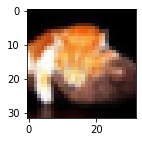

In [ ]:
plt.figure(figsize = (2,2))
plt.imshow(npimg)
plt.show()

In [ ]:
def imshow(image):
    npimg=image.numpy()
    plt.imshow(np.transpose(npimg,(1,2,0)))
    plt.show()

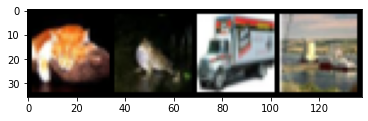

cat         frog         truck         ship


In [ ]:
imshow(torchvision.utils.make_grid(images))
print("         ".join(classes[labels[j]] for j in range(4)))

SINGLE CONVOLUTIONAL LAYER

In [ ]:
import torch.nn as nn

class FirstCNN(nn.Module):
    def __init__(self):
        super(FirstCNN,self).__init__()
        self.conv1=nn.Conv2d(3,16,3,padding=(1,1)) #padding=(1,1) , stride=(2,2)

    def forward(self,x):
        x=self.conv1(x)
        return x

In [ ]:
net=FirstCNN()

In [ ]:
out=net(images)
out.shape

torch.Size([4, 16, 32, 32])

In [ ]:
out1=out[0,0,:,:].detach().numpy()
print(out1.shape)

(32, 32)


<function matplotlib.pyplot.show>

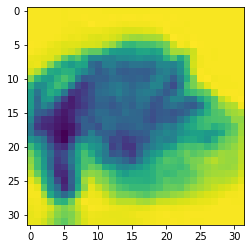

In [ ]:
plt.imshow(out1)
plt.show

DEEP CONVOLUTION NETWORK

In [ ]:
class FirstCNN_v2(nn.Module):
    def __init__(self):
        super(FirstCNN_v2,self).__init__()
        self.model=nn.Sequential(
            nn.Conv2d(3,8,3),
            nn.Conv2d(8,16,3)
        )

    def forward(self,x):
        x=self.model(x)
        return x

In [ ]:
net=FirstCNN_v2()
out=net(images)
out.shape

torch.Size([4, 16, 28, 28])

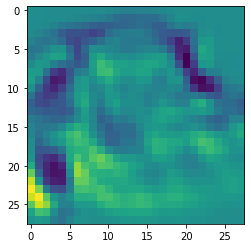

In [ ]:
plt.imshow(out[0,0,:,:].detach().numpy())

In [ ]:
class FirstCNN_v3(nn.Module):
    def __init__(self):
        super(FirstCNN_v3,self).__init__()
        self.model=nn.Sequential(
            nn.Conv2d(3,6,5),
            nn.AvgPool2d(2,stride=2),
            nn.Conv2d(6,16,5),
            nn.AvgPool2d(2,stride=2),
        )

    def forward(self,x):
        x=self.model(x)
        return x

In [ ]:
net=FirstCNN_v3()
out=net(images)
out.shape

torch.Size([4, 16, 5, 5])

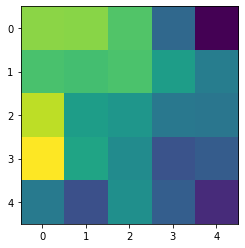

In [ ]:
plt.imshow(out[0,0,:,:].detach().numpy())

TRAINING LEENET

In [ ]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        self.cnn_model=nn.Sequential(
            nn.Conv2d(3,6,5),
            nn.Tanh(),
            nn.AvgPool2d(2,stride=2),
            nn.Conv2d(6,16,5),
            nn.Tanh(),
            nn.AvgPool2d(2,stride=2),
        )

        self.fc_model = nn.Sequential(
            nn.Linear(400,120),
            nn.Tanh(),
            nn.Linear(120,84),
            nn.Tanh(),
            nn.Linear(84,10)
        )
    def forward(self,x):
        print(x.shape)
        x=self.cnn_model(x)
        print(x.shape)
        x=x.view(x.size(0),-1)
        print(x.shape)
        x = self.fc_model(x)
        print(x.shape)
        return x

In [ ]:
net=LeNet()
out=net(images)

torch.Size([4, 3, 32, 32])
torch.Size([4, 16, 5, 5])
torch.Size([4, 400])
torch.Size([4, 10])


In [ ]:
print(out)

tensor([[ 0.0178,  0.0204,  0.0262, -0.0744,  0.0087, -0.1077, -0.0182, -0.0582,
          0.1230, -0.0215],
        [ 0.0166,  0.0089,  0.0425, -0.0779,  0.0226, -0.1192,  0.0380, -0.0326,
          0.0898,  0.0095],
        [-0.0051, -0.0040,  0.0378, -0.0670,  0.0324, -0.1206, -0.0106, -0.0472,
          0.1250,  0.0016],
        [ 0.0003,  0.0037,  0.0376, -0.0858,  0.0280, -0.1094, -0.0038, -0.0457,
          0.1325, -0.0019]], grad_fn=<AddmmBackward0>)


In [ ]:
max_values, pred_class=torch.max(out.data,1)
print(pred_class)

tensor([8, 8, 8, 8])


TRAINING

In [ ]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet,self).__init__()
        self.cnn_model=nn.Sequential(
            nn.Conv2d(3,6,5),
            nn.Tanh(),
            nn.AvgPool2d(2,stride=2),
            nn.Conv2d(6,16,5),
            nn.Tanh(),
            nn.AvgPool2d(2,stride=2),
        )

        self.fc_model = nn.Sequential(
            nn.Linear(400,120),
            nn.Tanh(),
            nn.Linear(120,84),
            nn.Tanh(),
            nn.Linear(84,10)
        )
    def forward(self,x):
        x=self.cnn_model(x)
        x=x.view(x.size(0),-1)
        x = self.fc_model(x)
        return x

In [ ]:
batch_size=128
trainset=torchvision.datasets.CIFAR10(root='./data',train=True,download=True,transform=transforms.ToTensor())
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)
testset=torchvision.datasets.CIFAR10(root='./data',train=False,download=True,transform=transforms.ToTensor())
testloader=torch.utils.data.DataLoader(testset,batch_size=batch_size,shuffle=True)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
net=LeNet()

In [ ]:
def evaluation(dataloader):
    total, correct= 0,0
    for data in dataloader:
        inputs, labels=data
        outputs=net(inputs)
        _, pred=torch.max(outputs.data,1)
        total+=labels.size(0)
        correct+=(pred==labels).sum().item()
    return 100*correct/total

In [ ]:
import torch.optim as optim

In [ ]:
loss_fn=nn.CrossEntropyLoss()
opt=optim.Adam(net.parameters())

Epoch: 0/16, Test acc: 37.92, Train acc: 38.24
Epoch: 1/16, Test acc: 43.03, Train acc: 43.89
Epoch: 2/16, Test acc: 47.26, Train acc: 47.27
Epoch: 3/16, Test acc: 49.66, Train acc: 50.38
Epoch: 4/16, Test acc: 51.29, Train acc: 53.18
Epoch: 5/16, Test acc: 51.59, Train acc: 54.17
Epoch: 6/16, Test acc: 53.67, Train acc: 56.86
Epoch: 7/16, Test acc: 53.39, Train acc: 57.04
Epoch: 8/16, Test acc: 54.07, Train acc: 58.64
Epoch: 9/16, Test acc: 55.06, Train acc: 60.10
Epoch: 10/16, Test acc: 55.07, Train acc: 61.17
Epoch: 11/16, Test acc: 54.82, Train acc: 61.77
Epoch: 12/16, Test acc: 55.59, Train acc: 62.94
Epoch: 13/16, Test acc: 55.33, Train acc: 63.59
Epoch: 14/16, Test acc: 55.67, Train acc: 64.52
Epoch: 15/16, Test acc: 55.44, Train acc: 64.86


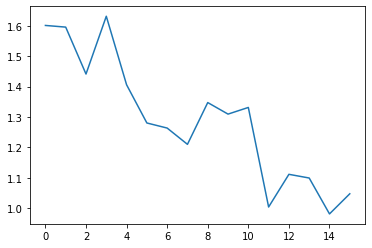

CPU times: user 7min 11s, sys: 4.66 s, total: 7min 16s
Wall time: 7min 29s


In [ ]:
%%time
loss_arr=[]
loss_epoch_arr=[]
max_epochs=16

for epoch in range(max_epochs):
    for i,data in enumerate(trainloader,0):
        inputs,labels=data

        opt.zero_grad()

        outputs=net(inputs)
        loss=loss_fn(outputs,labels)
        loss.backward()
        opt.step()

        loss_arr.append(loss.item())

    loss_epoch_arr.append(loss.item())

    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch,max_epochs,evaluation(testloader),evaluation(trainloader)))

plt.plot(loss_epoch_arr)
plt.show()

MOVE TO GPU

In [ ]:
device=torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print(device)

cuda:0


In [ ]:
def evaluation(dataloader):
    total, correct= 0,0
    for data in dataloader:
        inputs, labels=data
        inputs,labels=inputs.to(device),labels.to(device)
        outputs=net(inputs)
        _, pred=torch.max(outputs.data,1)
        total+=labels.size(0)
        correct+=(pred==labels).sum().item()
    return 100*correct/total

In [ ]:
net=LeNet().to(device)
loss_fn=nn.CrossEntropyLoss()
opt=optim.Adam(net.parameters())

Epoch: 0/16, Test acc: 36.79, Train acc: 36.95
Epoch: 1/16, Test acc: 43.42, Train acc: 43.20
Epoch: 2/16, Test acc: 46.44, Train acc: 47.39
Epoch: 3/16, Test acc: 48.21, Train acc: 49.54
Epoch: 4/16, Test acc: 49.79, Train acc: 52.19
Epoch: 5/16, Test acc: 51.30, Train acc: 54.04
Epoch: 6/16, Test acc: 52.41, Train acc: 55.95
Epoch: 7/16, Test acc: 53.03, Train acc: 57.18
Epoch: 8/16, Test acc: 53.05, Train acc: 57.81
Epoch: 9/16, Test acc: 53.35, Train acc: 59.02
Epoch: 10/16, Test acc: 53.88, Train acc: 60.09
Epoch: 11/16, Test acc: 55.20, Train acc: 61.90
Epoch: 12/16, Test acc: 54.61, Train acc: 62.67
Epoch: 13/16, Test acc: 55.39, Train acc: 63.70
Epoch: 14/16, Test acc: 55.17, Train acc: 64.55
Epoch: 15/16, Test acc: 55.05, Train acc: 65.13


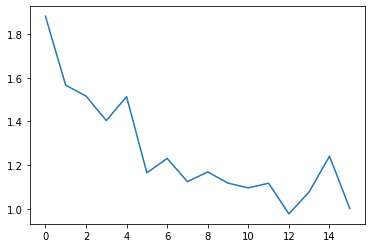

CPU times: user 3min 29s, sys: 1.06 s, total: 3min 31s
Wall time: 3min 31s


In [ ]:
%%time
loss_arr=[]
loss_epoch_arr=[]
max_epochs=16

for epoch in range(max_epochs):
    for i,data in enumerate(trainloader,0):
        inputs,labels=data
        inputs,labels=inputs.to(device),labels.to(device)

        opt.zero_grad()

        outputs=net(inputs)
        loss=loss_fn(outputs,labels)
        loss.backward()
        opt.step()

        loss_arr.append(loss.item())

    loss_epoch_arr.append(loss.item())

    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch,max_epochs,evaluation(testloader),evaluation(trainloader)))

plt.plot(loss_epoch_arr)
plt.show()